This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

### From the IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [5]:
words_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Making the required data


**Transforming integer sequences into multi-hot encoded vectors.**

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Making the first step

**Step : 1**

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling**

In [10]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating

**Put one  validation set for safe side**

In [142]:
x1_val = x_train[:10000]
partial_x1_train = x_train[10000:]
y1_val = y_train[:10000]
partial_y1_train = y_train[10000:]

**Training**

In [143]:
hist = model.fit(partial_x1_train,
                    partial_y1_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x1_val, y1_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - accuracy: 0.9601 - loss: 0.0342 - val_accuracy: 0.9664 - val_loss: 0.0308
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.9747 - loss: 0.0246 - val_accuracy: 0.9231 - val_loss: 0.0557
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.9734 - loss: 0.0250 - val_accuracy: 0.9537 - val_loss: 0.0375
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9827 - loss: 0.0182 - val_accuracy: 0.9605 - val_loss: 0.0330
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9816 - loss: 0.0181 - val_accuracy: 0.9580 - val_loss: 0.0347
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9807 - loss: 0.0185 - val_accuracy: 0.9555 - val_loss: 0.0361
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9850 - loss: 0.0155 - val_accuracy: 0.9527 - val_loss: 0.0380
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9900 - loss: 0.0106 - val_accuracy: 0.9515 -

In [13]:
history_d1 = history.history
history_d1.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plot th loss of training and validation **

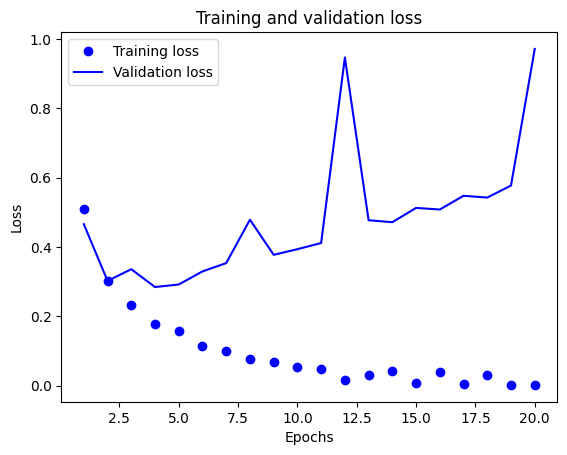

In [146]:
import matplotlib.pyplot as plt
history_d1 = history.history
loss_value = history_d1["loss"]
vali_loss_value = history_d1["val_loss"]
epochs = range(1, len(loss_value) + 1)
plt.plot(epochs, loss_value, "bo", label="Training loss")
plt.plot(epochs, vali_loss_value, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plot of  accuracy of training and validation **

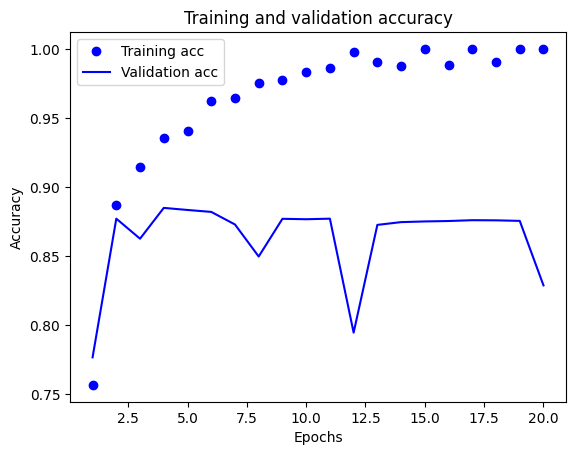

In [147]:
plt.clf()
acc_1 = history_dict["accuracy"]
val_acc_1 = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Creating a model from Beginning **

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7434 - loss: 0.5576
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8989 - loss: 0.2928
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9234 - loss: 0.2211
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9381 - loss: 0.1830
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8839 - loss: 0.2857


In [17]:
results_test

[0.28492024540901184, 0.8852800130844116]

In [18]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_val, y_val)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9438 - loss: 0.1623
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9518 - loss: 0.1417
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9565 - loss: 0.1323
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9636 - loss: 0.1151
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9723 - loss: 0.0935


In [19]:
results_val

[0.09679505974054337, 0.972000002861023]

### A train model to get predictions in the new data

In [20]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.14670989],
       [0.9997119 ],
       [0.58749694],
       ...,
       [0.12003429],
       [0.03933061],
       [0.8306811 ]], dtype=float32)

**Step :  2 **

In [21]:
# Using with one hidden layer and predicting accuracy and validation.
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling**

In [22]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**Validating **

**Put one validation set for safe side **

In [149]:
x_val2 = x_train[:10000]
partial_x_train = x_train[10000:]
y_val2 = y_train[:10000]
partial_y_train = y_train[10000:]

**Training **

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val2, y_val2))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.7003 - loss: 0.5870 - val_accuracy: 0.8614 - val_loss: 0.4064
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8954 - loss: 0.3500 - val_accuracy: 0.8829 - val_loss: 0.3289
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9179 - loss: 0.2675 - val_accuracy: 0.8784 - val_loss: 0.3084
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9285 - loss: 0.2272 - val_accuracy: 0.8871 - val_loss: 0.2856
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9413 - loss: 0.1938 - val_accuracy: 0.8875 - val_loss: 0.2805
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9444 - loss: 0.1769 - val_accuracy: 0.8857 - val_loss: 0.2812
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9526 - loss: 0.1612 - val_accuracy: 0.8876 - val_loss: 0.2777
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9589 - loss: 0.1408 - val_accuracy: 0.8844 - v

In [25]:
history_d2 = history.history
history_d2.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plot of  the  loss of training and validation **

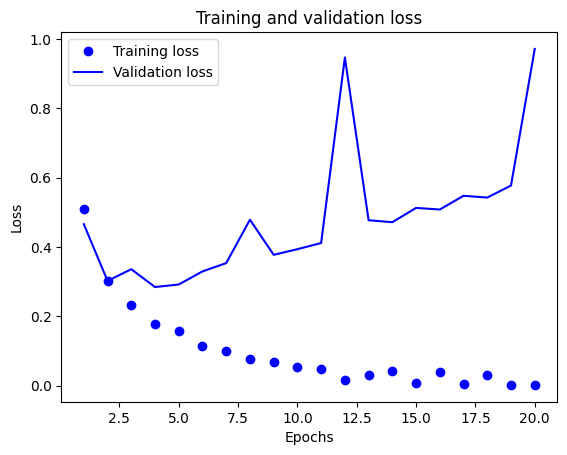

In [150]:
import matplotlib.pyplot as plt
history_d3 = history.history
loss_values = history_d3["loss"]
val2_loss_values = history_d3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val2_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Accuracy Plot of the training and validation **

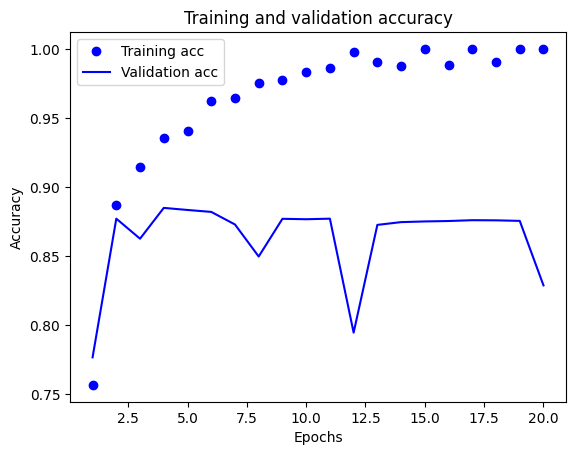

In [152]:
plt.clf()
acc_2 = history_dict["accuracy"]
vali_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc_2, "bo", label="Training acc")
plt.plot(epochs, vali_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Starting a  model from beginning **

In [28]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7470 - loss: 0.5342
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9060 - loss: 0.2856
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9220 - loss: 0.2275
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9342 - loss: 0.1956
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8842 - loss: 0.2877


In [29]:
results_test

[0.2847804129123688, 0.8859599828720093]

In [30]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9410 - loss: 0.1747
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9482 - loss: 0.1589
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9536 - loss: 0.1414
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9567 - loss: 0.1378
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8764 - loss: 0.3139


In [31]:
results_val

[0.312439501285553, 0.8776800036430359]

**### A train model to get predictions in the new data**

In [32]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.12204969],
       [0.9999512 ],
       [0.49193668],
       ...,
       [0.07327508],
       [0.03833191],
       [0.48965654]], dtype=float32)

**Step :  3**

In [33]:
# Using  three hidden layers
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling**

In [34]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**Validating**

**Put one validation set for safe side **

In [155]:
x_vali = x_train[:10000]
partial_x4_train = x_train[10000:]
y_vali = y_train[:10000]
partial_y4_train = y_train[10000:]

**Training**

In [154]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9943 - loss: 0.0059 - val_accuracy: 0.9419 - val_loss: 0.0466
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9946 - loss: 0.0055 - val_accuracy: 0.9416 - val_loss: 0.0466
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9937 - loss: 0.0064 - val_accuracy: 0.9417 - val_loss: 0.0468
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9939 - loss: 0.0062 - val_accuracy: 0.9410 - val_loss: 0.0470
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9901 - loss: 0.0091 - val_accuracy: 0.9403 - val_loss: 0.0471
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.9944 - loss: 0.0057 - val_accuracy: 0.9396 - val_loss: 0.0474
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9937 - loss: 0.0064 - val_accuracy: 0.9393 - val_loss: 0.0480
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.9940 - loss: 0.0061 - val_accuracy: 0.9392 - 

In [37]:
history_d4 = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plot of the loss of the  training and validation **

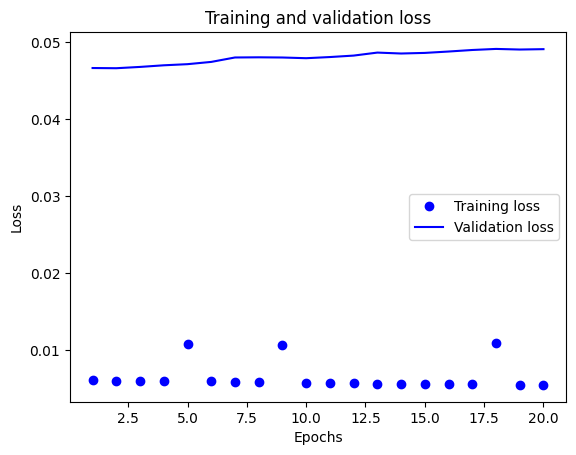

In [156]:
import matplotlib.pyplot as plt
history_d5 = history.history
loss_values = history_d5["loss"]
vali_loss_values = history_d5["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, vali_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

** Accuracy Plot of  the training and validation **

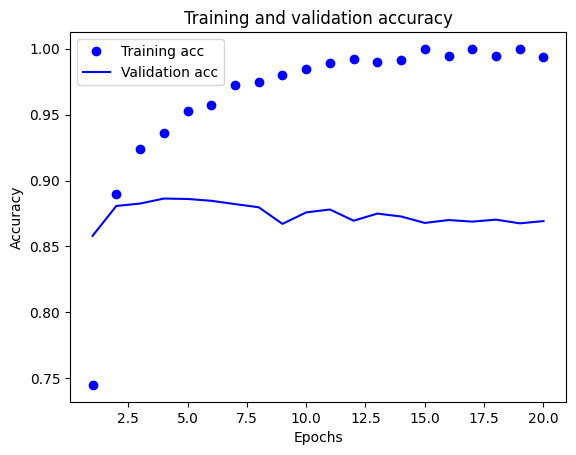

In [39]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Start a model from Beginning **

In [40]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7406 - loss: 0.5793
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8985 - loss: 0.2989
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9183 - loss: 0.2227
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9347 - loss: 0.1844
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8842 - loss: 0.2909


In [41]:
results_test

[0.28779137134552, 0.8863999843597412]

In [42]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9447 - loss: 0.1553
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9528 - loss: 0.1380
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9603 - loss: 0.1192
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9637 - loss: 0.1094
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8711 - loss: 0.3688


In [43]:
results_val

[0.3626615107059479, 0.8743600249290466]

**A train model to get predictions in the new data**

In [44]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.10783201],
       [0.99998784],
       [0.78086144],
       ...,
       [0.14478783],
       [0.03104182],
       [0.7697584 ]], dtype=float32)

**Step : 4**

In [45]:
# create the model with 32 units present in  the hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling **

In [46]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**Validating**

**Put one  validation set for safe side **

In [47]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training**

In [48]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.7042 - loss: 0.5645 - val_accuracy: 0.8515 - val_loss: 0.3850
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8981 - loss: 0.3156 - val_accuracy: 0.8796 - val_loss: 0.3137
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9227 - loss: 0.2449 - val_accuracy: 0.8817 - val_loss: 0.2941
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9339 - loss: 0.2059 - val_accuracy: 0.8886 - val_loss: 0.2788
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9413 - loss: 0.1812 - val_accuracy: 0.8883 - val_loss: 0.2754
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9488 - loss: 0.1607 - val_accuracy: 0.8844 - val_loss: 0.2925
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9563 - loss: 0.1398 - val_accuracy: 0.8779 - val_loss: 0.3108
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9616 - loss: 0.1304 - val_accuracy: 0.8850 - v

In [49]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plot the  loss of the training and validation **

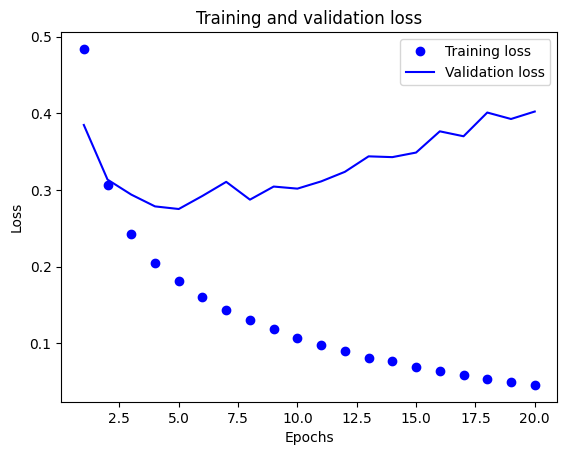

In [50]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo",  label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

** Accuracy Plot of  the training and validation **

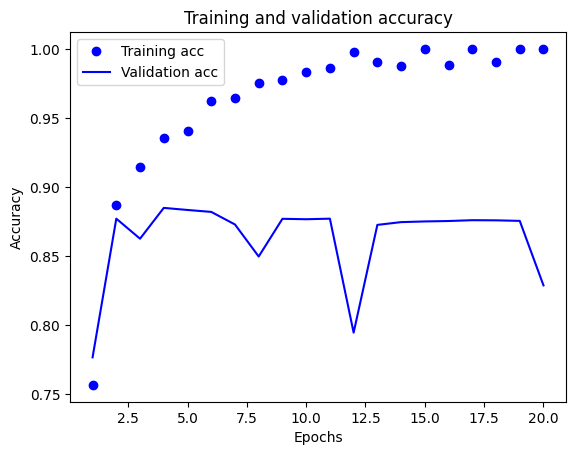

In [157]:
plt.clf()
acc5 = history_dict["accuracy"]
vali_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc5, "bo", label="Training acc")
plt.plot(epochs, vali_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Start a model from Beginning **

In [52]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7410 - loss: 0.5385
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9001 - loss: 0.2882
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9202 - loss: 0.2260
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9325 - loss: 0.1949
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8763 - loss: 0.3009


In [53]:
results_test

[0.3025279939174652, 0.8762800097465515]

In [54]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9416 - loss: 0.1744
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9438 - loss: 0.1631
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9517 - loss: 0.1428
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9535 - loss: 0.1386
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8742 - loss: 0.3183


In [55]:
results_val

[0.3171974718570709, 0.8760799765586853]

** A train model to create predictions on the  new data**

In [56]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.12271359],
       [0.9999771 ],
       [0.32462263],
       ...,
       [0.08401626],
       [0.0315804 ],
       [0.6146664 ]], dtype=float32)

**Step : 5**

In [57]:
# create a model with 64 units present in the hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling**

In [58]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**Validating **

**Put one validation set for safe side **

In [159]:
x6_val = x_train[:10000]
partial_x6_train = x_train[10000:]
y6_val = y_train[:10000]
partial_y6_train = y_train[10000:]

**Training**

In [160]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x6_val, y6_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.9944 - loss: 0.0057 - val_accuracy: 0.9379 - val_loss: 0.0492
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 0.9946 - loss: 0.0055 - val_accuracy: 0.9382 - val_loss: 0.0493
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9938 - loss: 0.0062 - val_accuracy: 0.9383 - val_loss: 0.0494
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9944 - loss: 0.0057 - val_accuracy: 0.9379 - val_loss: 0.0494
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9929 - loss: 0.0064 - val_accuracy: 0.9357 - val_loss: 0.0501
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9944 - loss: 0.0056 - val_accuracy: 0.9373 - val_loss: 0.0498
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9948 - loss: 0.0052 - val_accuracy: 0.9382 - val_loss: 0.0498
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9948 - loss: 0.0053 - val_accuracy: 0.9376 -

In [61]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plot the loss of the training and validation **

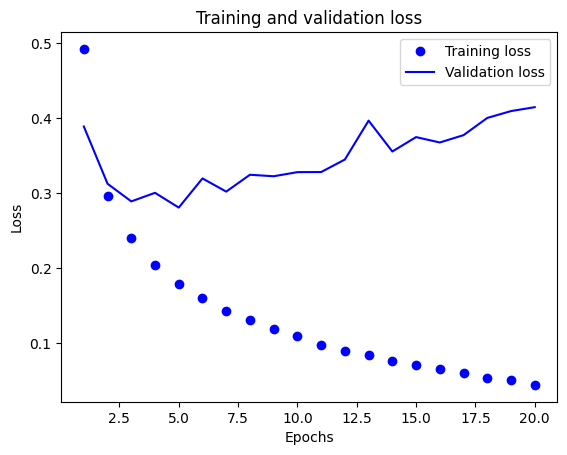

In [62]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

** Accuracy plot of  the training and validation **

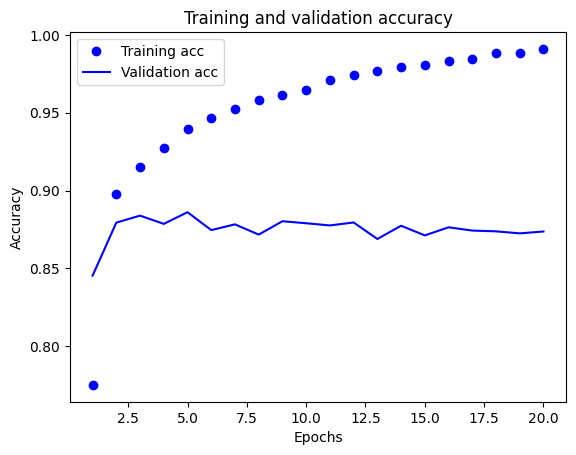

In [63]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Start a model from Beginning**


In [64]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.7177 - loss: 0.5379
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9016 - loss: 0.2814
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9203 - loss: 0.2231
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9266 - loss: 0.1980
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8842 - loss: 0.2814


In [65]:
results_test

[0.2804120182991028, 0.8869600296020508]

In [66]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9392 - loss: 0.1753
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9449 - loss: 0.1580
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9500 - loss: 0.1462
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9523 - loss: 0.1365
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8719 - loss: 0.3353


In [67]:
results_val

[0.33481502532958984, 0.8723199963569641]

**A train model to Create predictions on the new data**

In [68]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.11091012],
       [0.9999422 ],
       [0.20925736],
       ...,
       [0.06429263],
       [0.02567496],
       [0.54146606]], dtype=float32)

**Step :  6**

In [69]:
# create a model with MSE loss function instead of binary_crossentropy.
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling**

In [70]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

**Validating**

**put one  validation set for safe side**

In [71]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training **

In [72]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.6977 - loss: 0.2093 - val_accuracy: 0.8621 - val_loss: 0.1331
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8851 - loss: 0.1155 - val_accuracy: 0.8731 - val_loss: 0.1077
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9091 - loss: 0.0887 - val_accuracy: 0.8859 - val_loss: 0.0963
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9221 - loss: 0.0732 - val_accuracy: 0.8881 - val_loss: 0.0905
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9322 - loss: 0.0653 - val_accuracy: 0.8803 - val_loss: 0.0904
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9402 - loss: 0.0586 - val_accuracy: 0.8890 - val_loss: 0.0854
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9487 - loss: 0.0522 - val_accuracy: 0.8855 - val_loss: 0.0862
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9515 - loss: 0.0488 - val_accuracy: 0.8859 - v

In [73]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plot the loss of the training and validation **

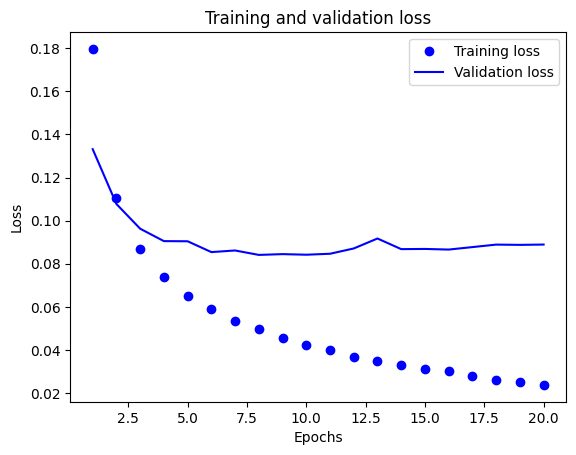

In [74]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

** Accuracy plot of  the training and validation **

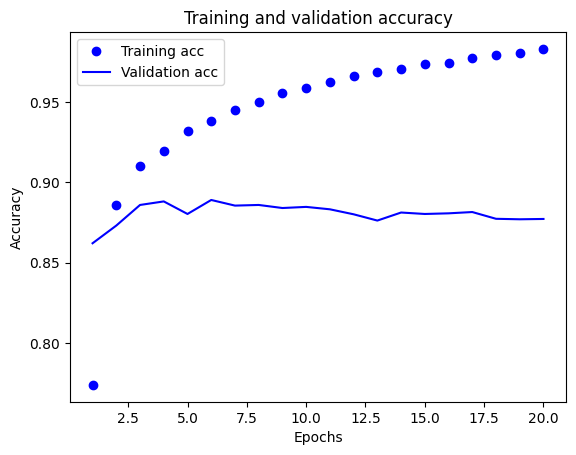

In [75]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo",label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Start a model from Beginning**

In [76]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7223 - loss: 0.1935
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8937 - loss: 0.0979
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9180 - loss: 0.0754
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9286 - loss: 0.0651
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8881 - loss: 0.0867


In [77]:
results_test

[0.08582395315170288, 0.8890799880027771]

In [78]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9320 - loss: 0.0598
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9362 - loss: 0.0562
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9452 - loss: 0.0494
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9506 - loss: 0.0474
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8837 - loss: 0.0858


In [79]:
results_val

[0.08486518263816833, 0.8854799866676331]

**A train model to create predictions on the new data**

In [80]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.15124826],
       [0.99989116],
       [0.75330347],
       ...,
       [0.17502424],
       [0.09805097],
       [0.54686314]], dtype=float32)

**Step :  7**

In [81]:
# create a  model with tanh activation instead of relu
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling**

In [82]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

**Validating**

**Put one validation set for safe side**

In [83]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training**

In [84]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.7087 - loss: 0.1991 - val_accuracy: 0.8636 - val_loss: 0.1315
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8874 - loss: 0.1145 - val_accuracy: 0.8686 - val_loss: 0.1101
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9070 - loss: 0.0895 - val_accuracy: 0.8833 - val_loss: 0.0954
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9191 - loss: 0.0744 - val_accuracy: 0.8858 - val_loss: 0.0899
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.9332 - loss: 0.0635 - val_accuracy: 0.8864 - val_loss: 0.0862
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9390 - loss: 0.0577 - val_accuracy: 0.8865 - val_loss: 0.0843
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9506 - loss: 0.0502 - val_accuracy: 0.8859 - val_loss: 0.0835
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9536 - loss: 0.0456 - val_accuracy: 0.8862 - v

In [85]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plot the loss of the training and validation **

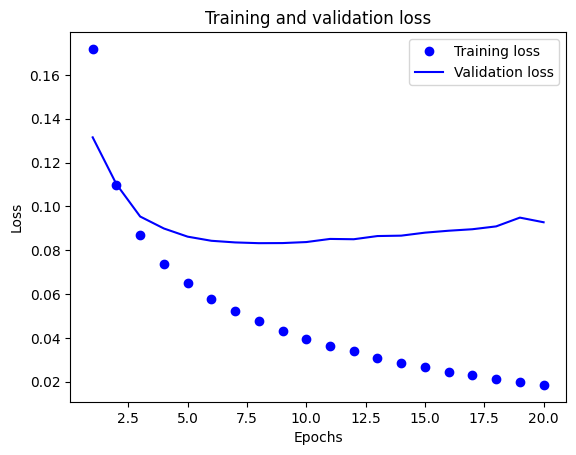

In [86]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

** Accuracy plot of  the training and validation **

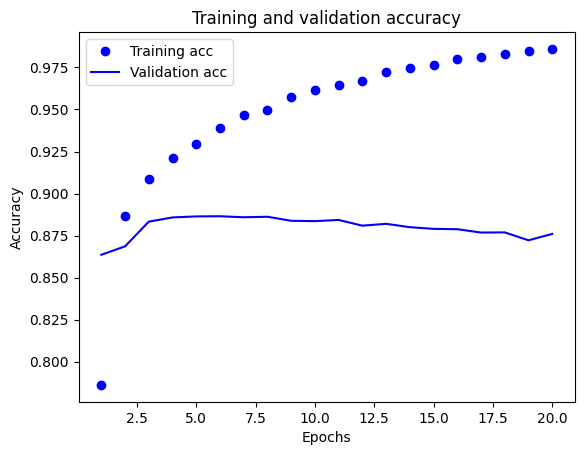

In [87]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Start a model from Beginning**

In [88]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7416 - loss: 0.1810
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8972 - loss: 0.0944
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9166 - loss: 0.0730
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9289 - loss: 0.0624
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8769 - loss: 0.0917


In [89]:
results_test

[0.09033620357513428, 0.8795999884605408]

In [90]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9336 - loss: 0.0574
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9474 - loss: 0.0484
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9476 - loss: 0.0464
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9512 - loss: 0.0434
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8790 - loss: 0.0879


In [91]:
results_val

[0.0865839347243309, 0.8828799724578857]

**A  train model to create predictions on the new data**

In [92]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.11515706],
       [0.9996466 ],
       [0.8018438 ],
       ...,
       [0.15826435],
       [0.09032363],
       [0.64277226]], dtype=float32)

** Step:  8**

In [93]:
# create a model with regularization.
from tensorflow import keras
from tensorflow.keras import layers, regularizers

model = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1, activation="sigmoid")
])


**Compiling**

In [94]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

**Validating **

**Put one validation set for safe side**

In [95]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training **

In [96]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.6912 - loss: 0.3940 - val_accuracy: 0.8376 - val_loss: 0.1888
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8647 - loss: 0.1709 - val_accuracy: 0.8672 - val_loss: 0.1575
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.8807 - loss: 0.1496 - val_accuracy: 0.8257 - val_loss: 0.1657
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8814 - loss: 0.1442 - val_accuracy: 0.8538 - val_loss: 0.1537
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.8844 - loss: 0.1427 - val_accuracy: 0.8569 - val_loss: 0.1500
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8789 - loss: 0.1406 - val_accuracy: 0.8631 - val_loss: 0.1464
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.8830 - loss: 0.1383 - val_accuracy: 0.8296 - val_loss: 0.1614
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8792 - loss: 0.1389 - val_accuracy: 0.8620 - v

In [97]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plot the loss of  the training and validation **

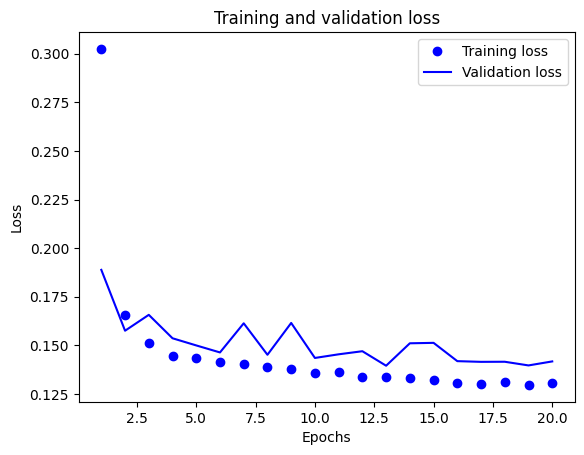

In [98]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

** Accuracy plot of the training and validation **

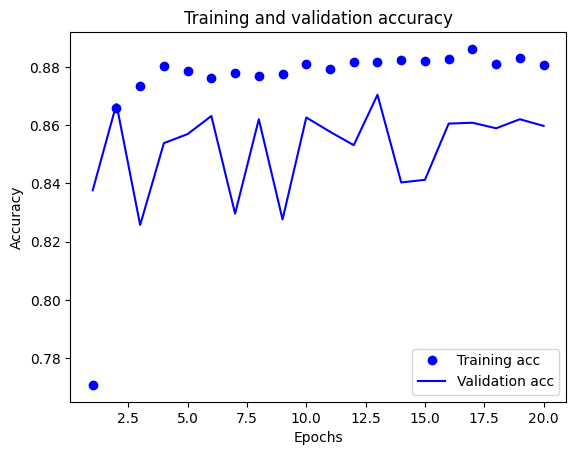

In [99]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Start a model from Beginning **

In [100]:
model = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.01) ),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7202 - loss: 0.3500
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8706 - loss: 0.1550
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8619 - loss: 0.1499
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8659 - loss: 0.1463
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8507 - loss: 0.1518


In [101]:
results_test

[0.1502126306295395, 0.8536800146102905]

In [102]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8726 - loss: 0.1402
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8735 - loss: 0.1381
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8743 - loss: 0.1386
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8745 - loss: 0.1349
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8683 - loss: 0.1394


In [103]:
results_val

[0.13834066689014435, 0.8698800206184387]

**A train model to create predictions on the  new data**

In [104]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.44192678],
       [0.9661621 ],
       [0.82666004],
       ...,
       [0.23849522],
       [0.27567795],
       [0.49996775]], dtype=float32)

**step:  9**

In [105]:
# create a model with Dropout
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

**Compiling**

In [106]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

**Validating **

**Splitting the data into the training and validation sets**

In [107]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training the model with the validation data**

In [108]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.6604 - loss: 0.2156 - val_accuracy: 0.8372 - val_loss: 0.1441
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8438 - loss: 0.1364 - val_accuracy: 0.8712 - val_loss: 0.1119
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8785 - loss: 0.1096 - val_accuracy: 0.8798 - val_loss: 0.0985
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8940 - loss: 0.0934 - val_accuracy: 0.8829 - val_loss: 0.0932
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9049 - loss: 0.0835 - val_accuracy: 0.8828 - val_loss: 0.0896
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9139 - loss: 0.0766 - val_accuracy: 0.8835 - val_loss: 0.0878
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9289 - loss: 0.0649 - val_accuracy: 0.8824 - val_loss: 0.0872
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9272 - loss: 0.0649 - val_accuracy: 0.8874 - v

In [109]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plot the loss of the training and validation **

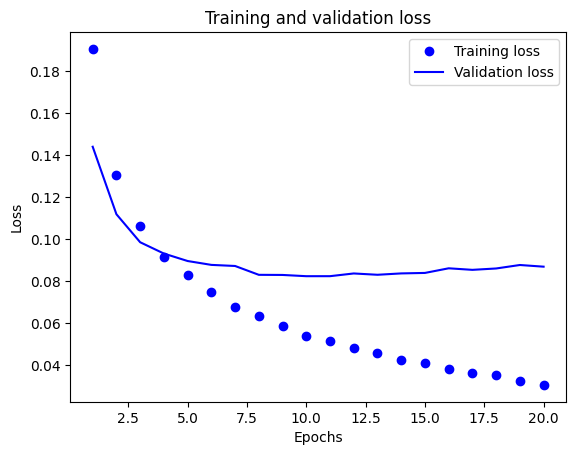

In [110]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

** Accuracy plot of the training and validation **

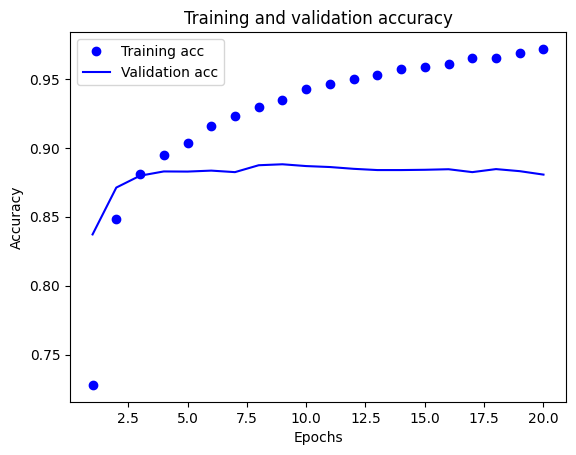

In [111]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Start a model from Beginning **

In [112]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6923 - loss: 0.2019
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8552 - loss: 0.1244
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8851 - loss: 0.0997
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8988 - loss: 0.0885
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8863 - loss: 0.0885


In [113]:
results_test

[0.0877077504992485, 0.886680006980896]

In [114]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9119 - loss: 0.0774
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9215 - loss: 0.0704
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9256 - loss: 0.0664
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9327 - loss: 0.0610
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8842 - loss: 0.0850


In [115]:
results_val

[0.08381880074739456, 0.8871200084686279]

** A train model to Create predictions on the  new data**

In [116]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.15051962],
       [0.999847  ],
       [0.9429894 ],
       ...,
       [0.14623082],
       [0.12289925],
       [0.5498121 ]], dtype=float32)

**Step : 10**

In [117]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

**Compiling **

In [118]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

**Validating **

**Splitting the data into the  training and validation sets**


In [119]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training the model with teh  validation data**

In [120]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.6807 - loss: 0.2040 - val_accuracy: 0.8598 - val_loss: 0.1250
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.8777 - loss: 0.1136 - val_accuracy: 0.8784 - val_loss: 0.1009
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9095 - loss: 0.0845 - val_accuracy: 0.8808 - val_loss: 0.0926
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9175 - loss: 0.0725 - val_accuracy: 0.8836 - val_loss: 0.0875
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9293 - loss: 0.0640 - val_accuracy: 0.8754 - val_loss: 0.0922
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9332 - loss: 0.0585 - val_accuracy: 0.8880 - val_loss: 0.0830
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9455 - loss: 0.0508 - val_accuracy: 0.8846 - val_loss: 0.0864
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9457 - loss: 0.0484 - val_accuracy: 0.8858 - 

In [121]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plot the loss of  the training and validation **

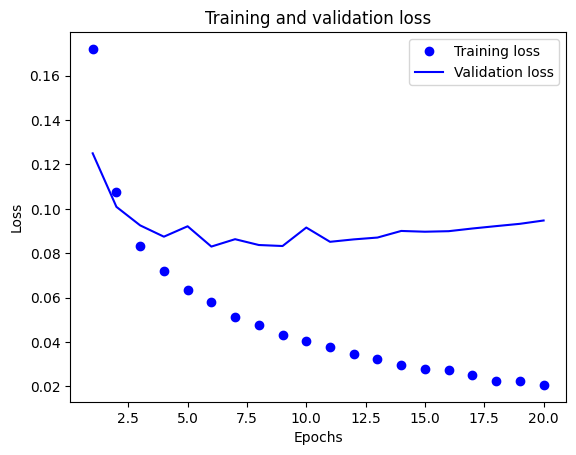

In [122]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

** Accuracy Plot of  the training and validation **

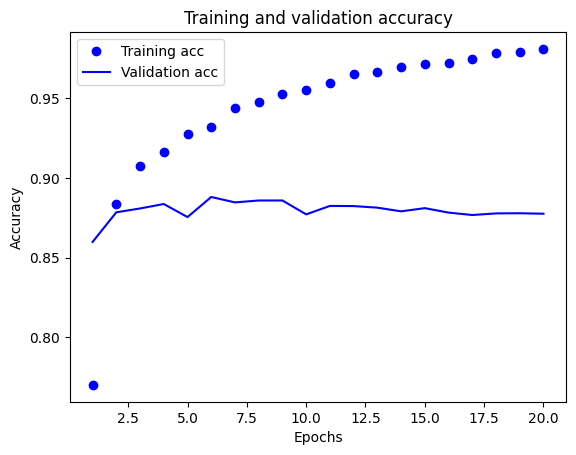

In [123]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Start a model from Beginning **

In [124]:
model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7367 - loss: 0.1853
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8867 - loss: 0.0972
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9101 - loss: 0.0759
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9213 - loss: 0.0652
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8829 - loss: 0.0871


In [125]:
results_test

[0.08590222895145416, 0.8845999836921692]

In [126]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9323 - loss: 0.0583
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9357 - loss: 0.0548
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9416 - loss: 0.0489
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9467 - loss: 0.0465
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8813 - loss: 0.0877


In [127]:
results_val

[0.08612927049398422, 0.8847600221633911]

** A train model to create predictions on the new data**

In [128]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.0920575 ],
       [0.9999588 ],
       [0.8516975 ],
       ...,
       [0.15714012],
       [0.06555225],
       [0.6063645 ]], dtype=float32)